In [10]:
from matplotlib import pyplot as plt
import requests
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Definição de todas as colunas numéricas e como ler o dataset

In [3]:
numerical_cols = [
    'length', 'diameter', 'height', 
    'whole_weight', 'shucked_weight', 'viscera_weight', 
    'shell_weight', 'height_t_shell', 'length_p_shell', 
    'diameter_t_shell'
]

def load_data(file_path='abalone_dataset.csv'):
    return pd.read_csv(file_path)

## Funções utilizadas no código

In [4]:
def preprocess_data(df):
    df['height_t_shell'] = (df['height'] * df['shell_weight'])
    df['length_p_shell'] = df['length'] + df['shell_weight']
    df['diameter_t_shell'] = df['diameter'] * df['shell_weight']

    # Use OneHotEncoder for categorical columns
    df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
    
    # Normalize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Generate new rows mean with noise
    new_rows = df.sample(frac=0.1, random_state=42, weights=(df['sex_I']))

    # Get average values of numerical columns
    average_values = df[numerical_cols].mean()
    unitRandomValues = np.random.uniform(low=-0.1, high=0.1, size=new_rows[numerical_cols].shape)

    new_rows[numerical_cols] +=  unitRandomValues
    df = pd.concat([df, new_rows])

    return df

In [5]:
def split_data(X, y):
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

    for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    return X_train, X_test, y_train, y_test

In [6]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Acurácia: {accuracy}")
    return y_pred

In [7]:
def train_svc_after_forest(X_train, y_train):
    # Train SVM classifier
    svm_classifier = SVC(random_state=42, kernel='rbf', C=100, gamma='auto', probability=True, break_ties=True, class_weight='balanced')
    svm_classifier.fit(X_train, y_train)
    return svm_classifier

## Carregar os dados

In [8]:
# Load data
df = load_data()

## Aplicando engenharia de características e adição de novas linhas

In [11]:
# Preprocess data
preprocessed_df = preprocess_data(df)

# Separate features and target variable
X = preprocessed_df.drop('type', axis=1)
y = preprocessed_df['type']

# Split data
X_train, X_test, y_train, y_test = split_data(X, y)

## Treinamento e avaliação do modelo

In [15]:
svm_classifier = train_svc_after_forest(X_train, y_train)

y_pred = evaluate_model(svm_classifier, X_test, y_test)

Acurácia: 0.688588007736944


# Plotting Data

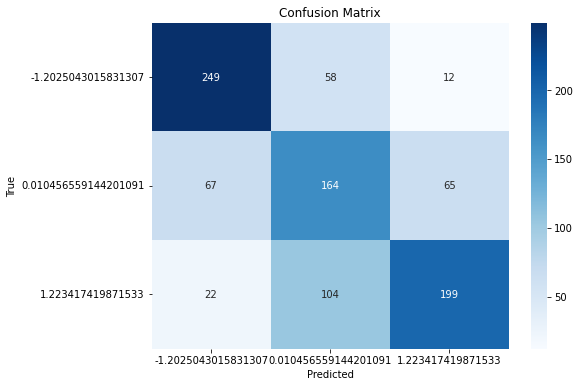

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
y_pred = knn.predict(X_teste)
conf_matrix = confusion_matrix(y_teste, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
df = pd.read_csv('abalone_dataset.csv')

def visualize_histograms(df, columns):
    for column in columns:
        plt.figure().set_facecolor('white')
        plt.hist(df[column], bins=20)
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.title(f'Histogram: {column}')
        plt.savefig(f'histogram_{column}.png')
        plt.close()
        
visualize_histograms(df, ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'type'])

<Figure size 432x288 with 0 Axes>

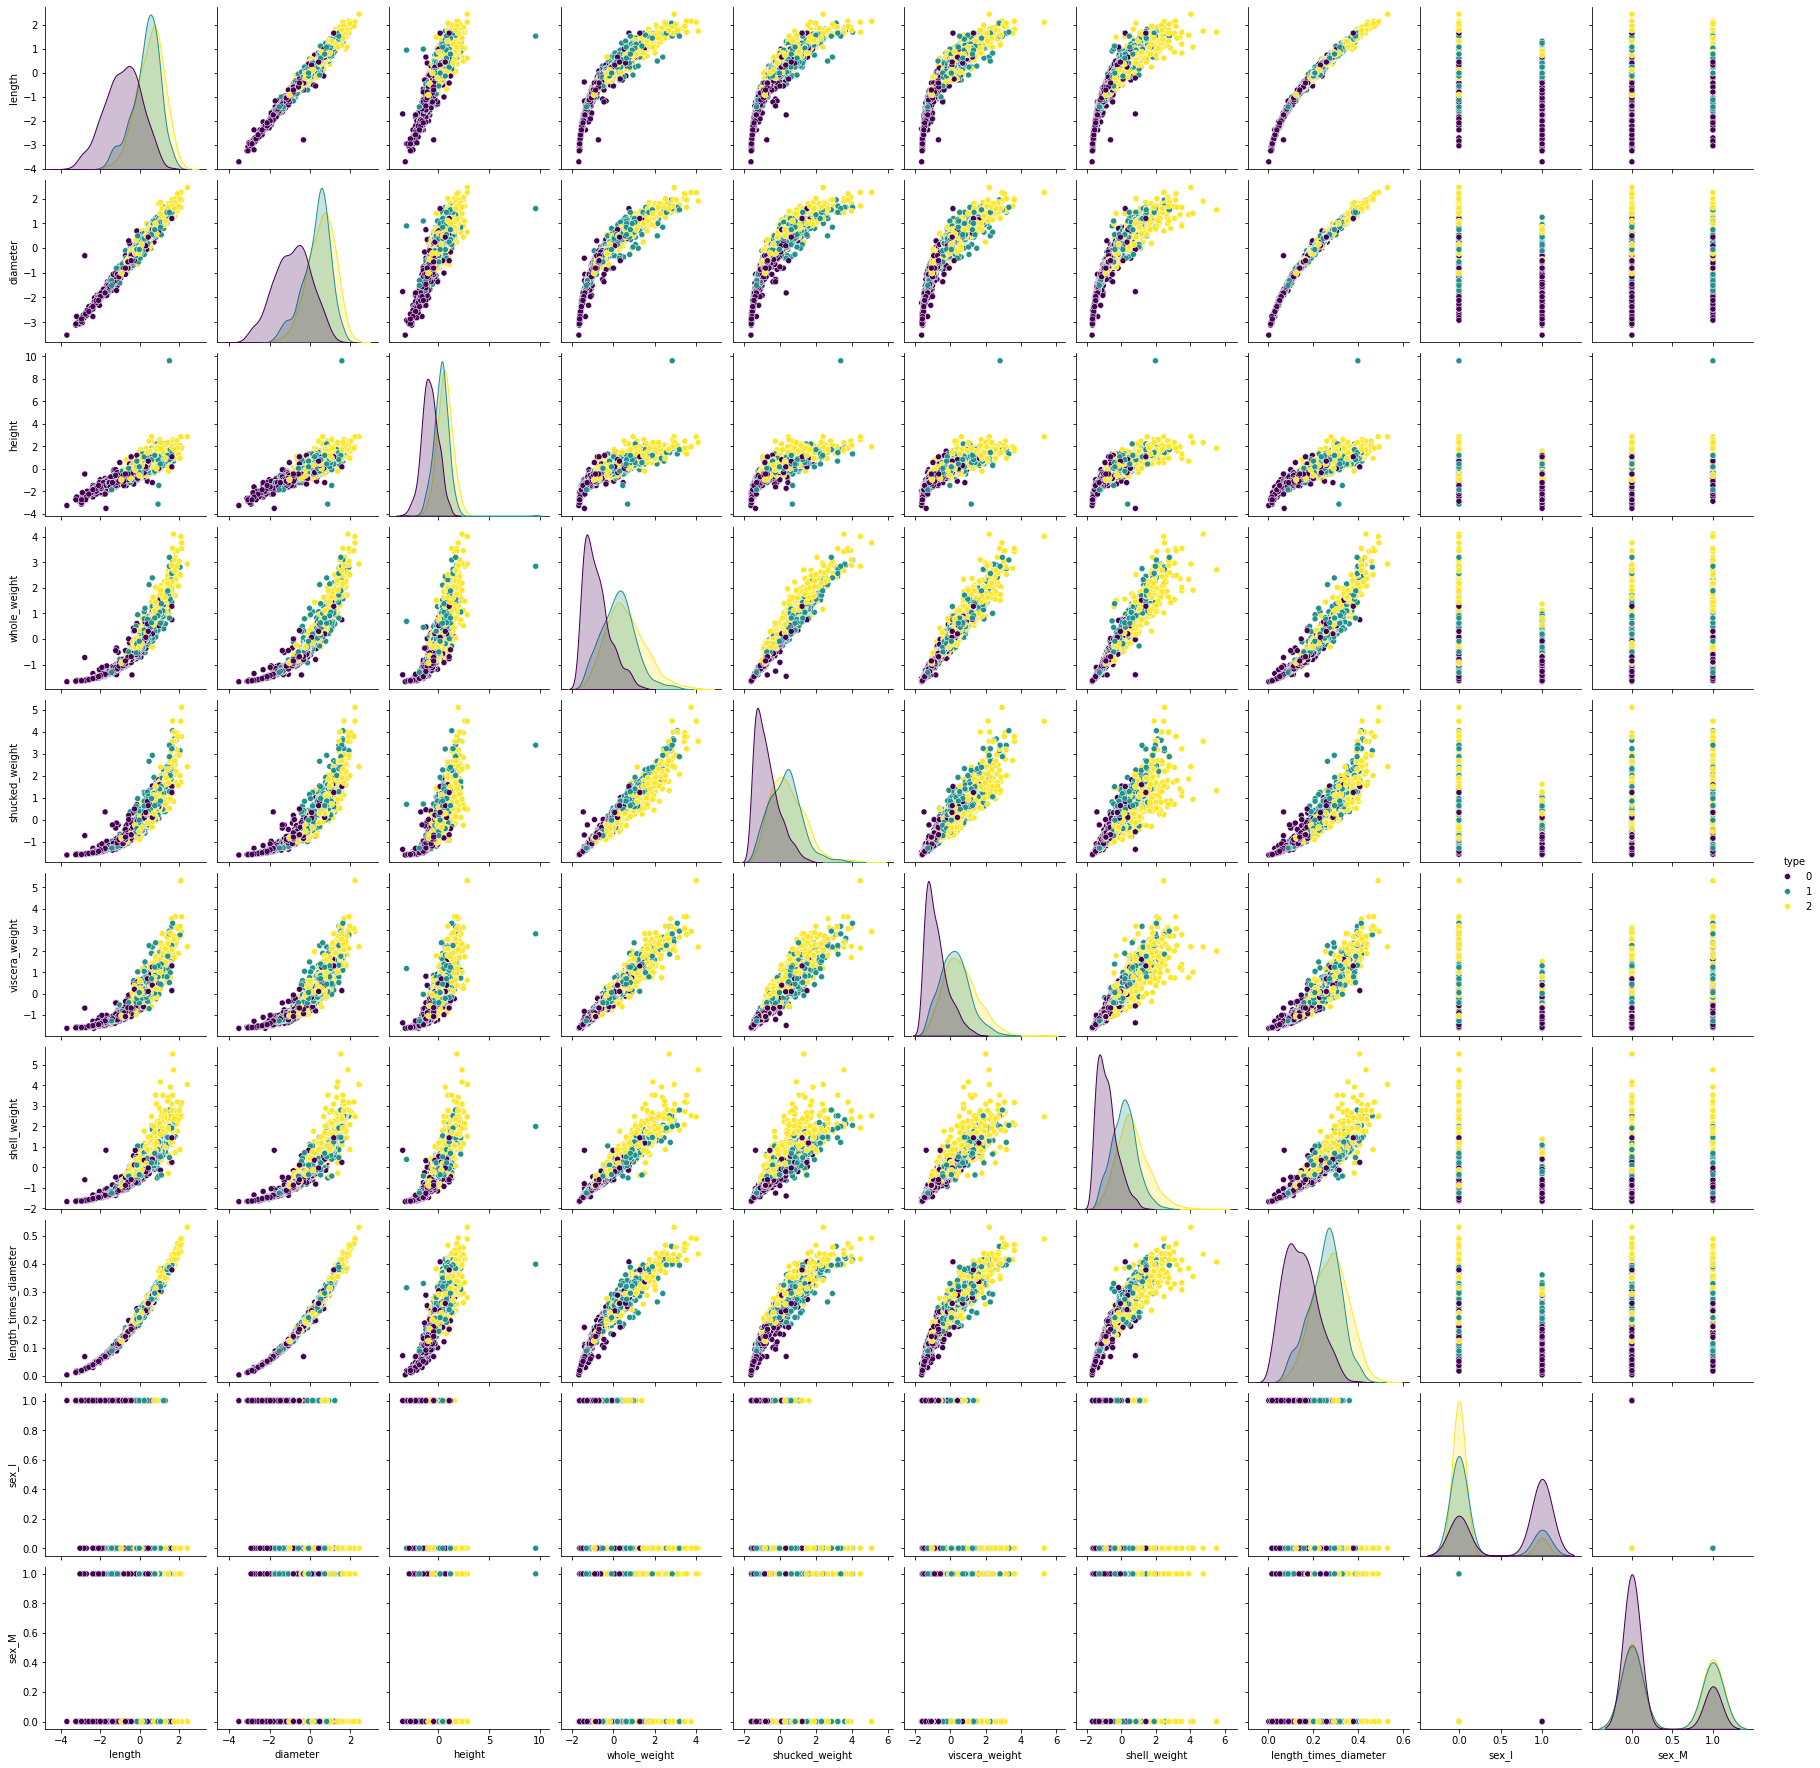

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the training features and labels into one DataFrame for visualization
df_pairplot = X_treino.copy()
df_pairplot['type'] = y_treino

# Create a pair plot
plt.figure().set_facecolor('white')
sns.pairplot(df_pairplot, hue='type', palette='viridis')
""" save the plot """
plt.savefig('./pairplot/pairplot.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the features
columns = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Sending Previsions

In [12]:
# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Codevinci"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

NameError: name 'requests' is not defined